<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## AULA 1 - ANÁLISES PRELIMINARES 

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [54]:
dados = pd.read_csv('C:/Users/lucas/Downloads/Alura/Formação Data Science/2 - Modelos de Data Science/5 - Regressão Linear - Testando Relações/Downloads/Aula 0 - Iniciando o Curso/data-science/reg-linear/Dados/Consumo_cerveja.csv', sep=';')

## Visualizar os dados

In [55]:
dados.head(10)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
5,06/01/2015,23.78,20.1,30.5,12.2,0,28218
6,07/01/2015,24.00,19.5,33.7,0.0,0,29732
7,08/01/2015,24.90,19.5,32.8,48.6,0,28397
8,09/01/2015,28.20,21.9,34.0,4.4,0,24886
9,10/01/2015,26.76,22.1,34.2,0.0,1,37937


## Verificando o tamanho do dataset

In [56]:
dados.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [57]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

Quando uma variável está "subindo", outra está "caindo", este é um exemplo de associação negativa. Já a positiva seria justamente o contrário, uma variável "sobe" e a outra acompanha essa ascendência.

In [58]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


Esta tabela mostra a correlação de uma variável com a outra. Na primeira linha temos a variável temp_media e ela se correlaciona com a variável da primeira coluna (1,1) que é ela mesma em 1.0 obviamente. Já com a variável temp_min (1,2) ela se correlaciona como 0.8628.

Estes valores são os coeficientes lineares

Ao observarmos a variável chuva, temos o valor negativo -0.1938. O que podemos interpretar deste dado? Quando chove, a tendência é que o consumo de cerveja diminua, por isso o valor negativo. Já em no caso de fds, verificamos que o consumo se eleva.

Em processo de regressão linear, teremos uma variável dependente dos valores de X (Y), e as variáveis auxiliares que explicarão esse consumo (X)

O estudo do nosso modelo é observar como o CONSUMO varia em relação a outras variáveis, ou seja o CONSUMO é a variável dependente (Y), e as variáveis independentes (X) que ditarão seu comportamento são as restantes. 

É um exercício simples. É só imaginar que o consumo de cerveja em uma cidade pode diminuir ou aumentar dependendo do tempo (chuva, sol)

## AULA 2 - COMPORTAMENTO DA VARIÁVEL DEPENDENTE 

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [59]:
x,y = (28,11)

In [60]:
x

28

In [61]:
y

11

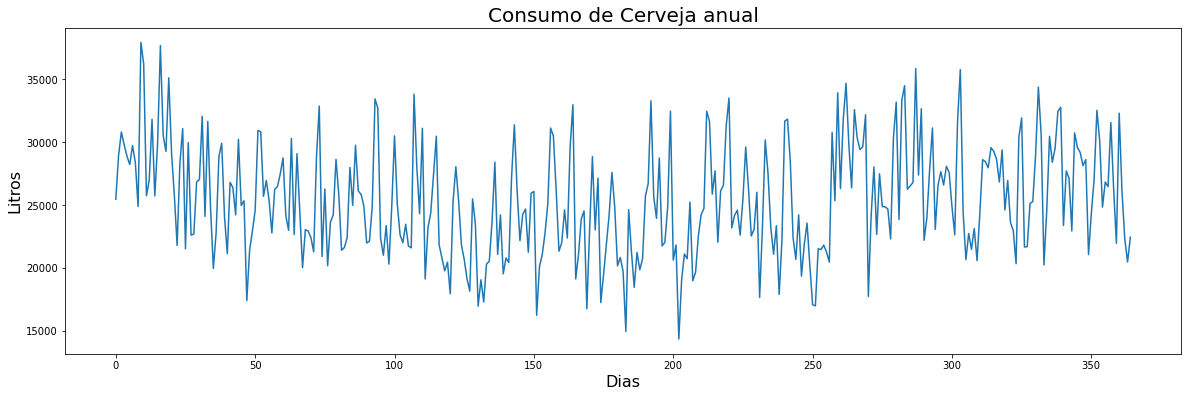

In [62]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja anual',fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax=dados['consumo'].plot()

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

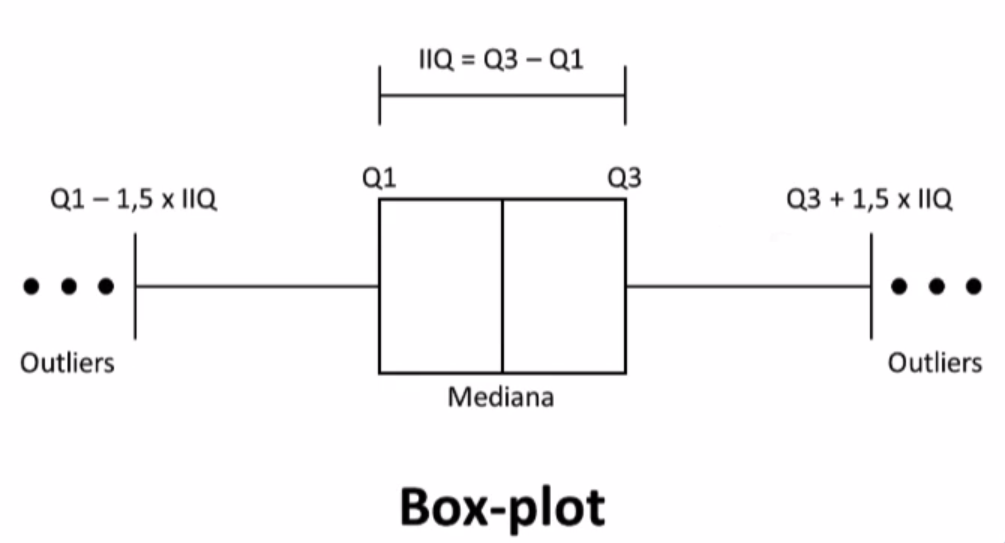<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [63]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0.5, 0, 'Dias')

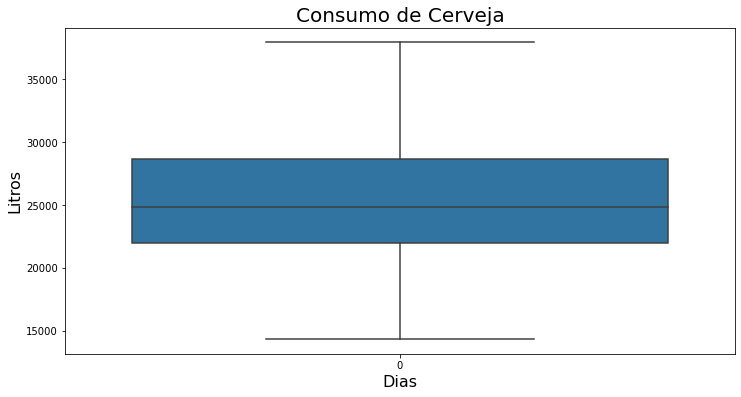

In [64]:
ax = sns.boxplot(data=dados['consumo'], orient='v')
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja',fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

Já construímos um gráfico da nossa variável dependente consumo. O que faremos nesta aula é um plus, adicionando a variável fds como "by", isto é, "segundo o fim de semana...".

<AxesSubplot:title={'center':'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

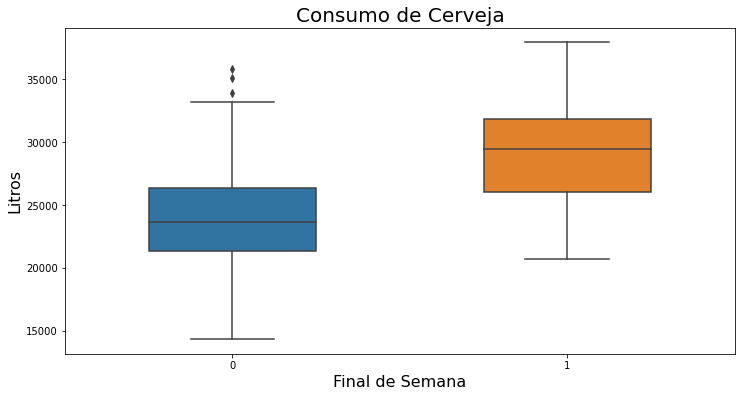

In [65]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

Em nosso notebook encontraremos uma célula já preenchida com algumas informações: na verdade, todas as paletas de cores possíveis. Para configurá-las utilizamos sns.set_palette("") e inserimos, por exemplo, a cor Accent. Para mudar o estilo do gráfico, utilizaremos uma estrutura semelhante sns.set_style("")

In [66]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

<AxesSubplot:title={'center':'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

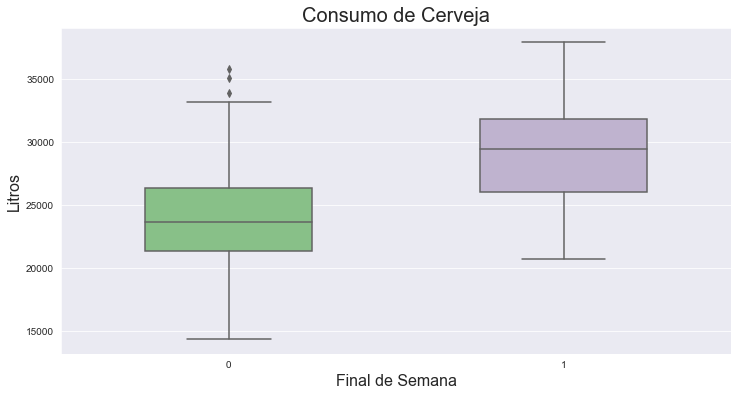

In [67]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distrubuição de Frequências'}, xlabel='consumo', ylabel='Consumo de Cerveja(Litros)'>

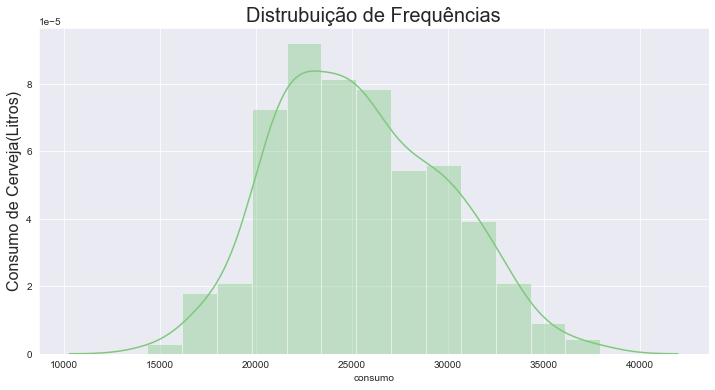

In [68]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

# AULA 3 

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

In [69]:
dados.corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


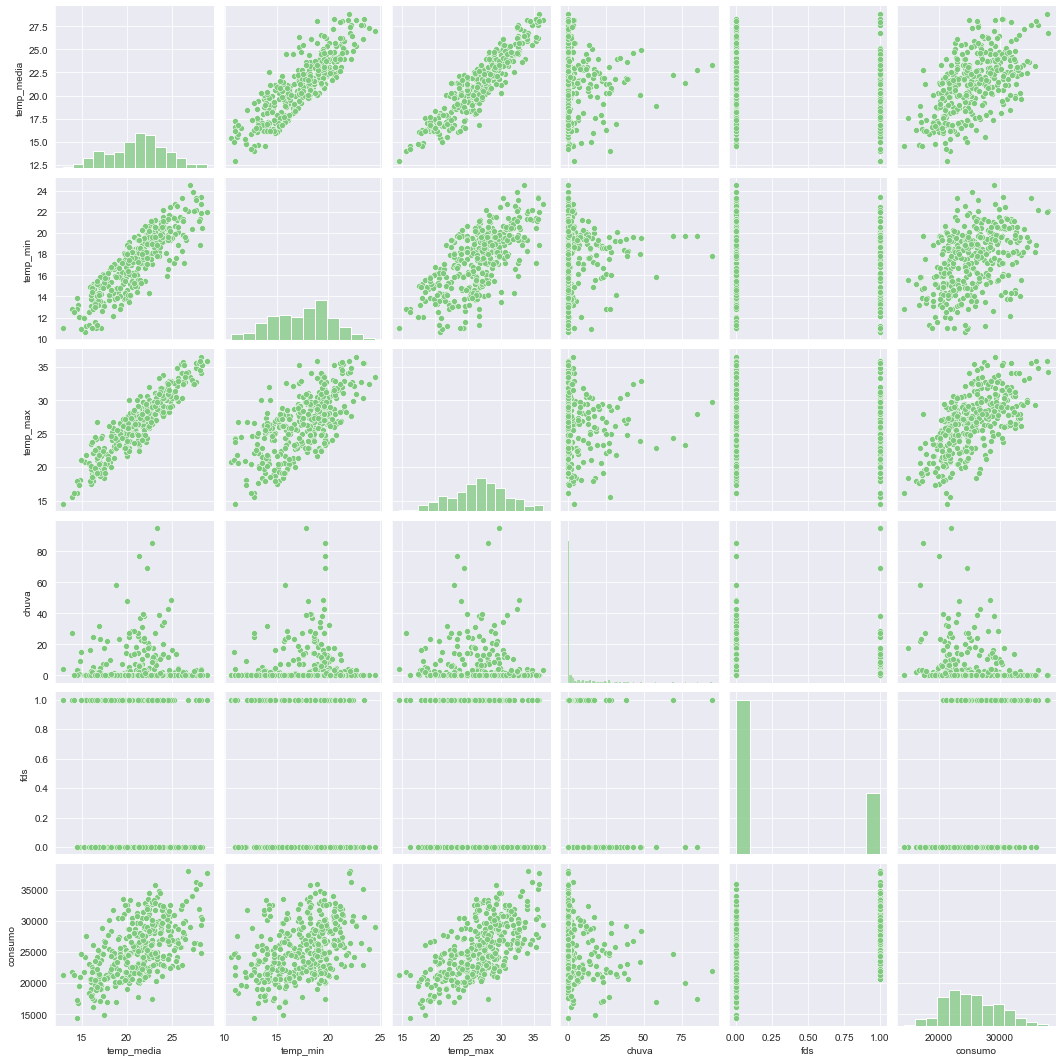

In [70]:
ax = sns.pairplot(dados)

a função pairplot plota diversos gráficos baseado no nosso df. Cada linha e coluna é uma variável do df. Como o que importa para nossa análise é o consumo, a última linha possui a relação do consumo (eixo Y - dependente) em relação as variáveis independentes (X) como por exemplo temp_media

## Plotando o pairplot fixando somente uma variável no eixo y

Selecionando apenas os gráficos de consumo em relação as variáveis que queremos analisar

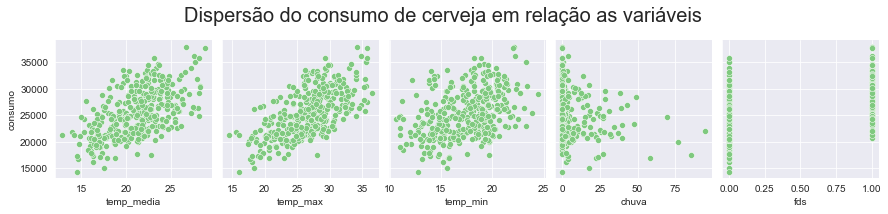

In [71]:
ax = sns.pairplot(dados, y_vars='consumo',x_vars=['temp_media','temp_max','temp_min','chuva','fds',])
ax.fig.suptitle('Dispersão do consumo de cerveja em relação as variáveis', fontsize=20,y=1.15)
ax

Ou seja, analisando os dados, percebe-se que a temp_media aumenta e o consumo de cerveja também. O mesmo vale para temp_max. Já para chuva o consumo diminui drasticamente e no fim de semana ele fica concentrado em 0 (semana) e 1 (fim de semana)

Adicionando o argumento kind='reg' no código acima, ele plota a reta nos gráficos

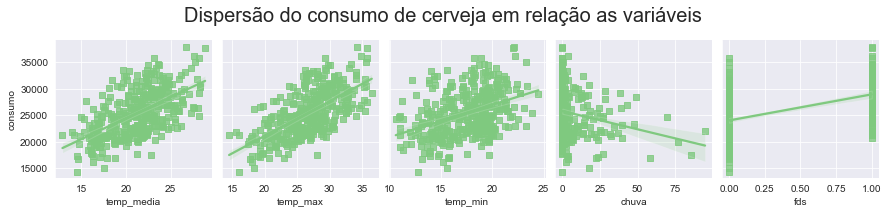

In [72]:
ax = sns.pairplot(dados, y_vars='consumo',x_vars=['temp_media','temp_max','temp_min','chuva','fds',],kind='reg', markers=['s'])
ax.fig.suptitle('Dispersão do consumo de cerveja em relação as variáveis', fontsize=20,y=1.15)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

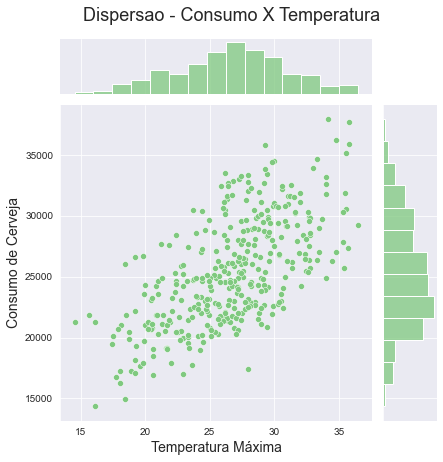

In [73]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

## Plotando um jointplot com a reta de regressão estimada

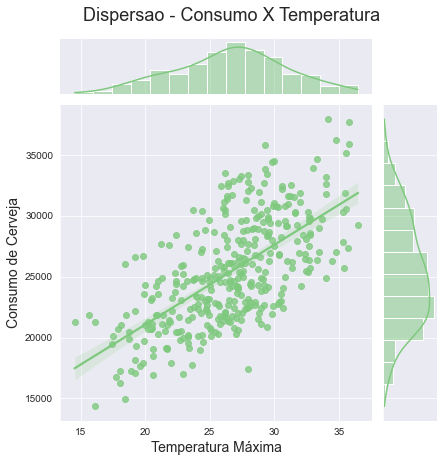

In [74]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind='reg')
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

O gráfico mostra a relação do consumo por temperatura máxima em forma de dispersão de dados, e também a distribuição de frequência de cada uma das variáveis

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

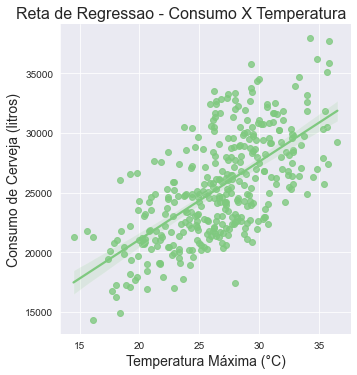

In [75]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

Chamaremos o parâmetro hue="fds", em seguida, iremos configurar marcadores diferentes para quando for fim de semana e para quando não for. Para tanto, escreveremos markers=['o','*']. Precisaremos, ainda, inserir legend=False, caso contrário serão criadas duas legendas de maneira desnecessária.

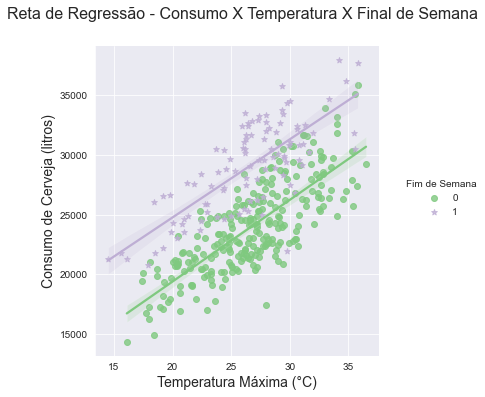

In [76]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, hue="fds", markers=['o', '*'], legend=False)
#hue é uma variável a ser plotada com cor diferente
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.08)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
ax

Isso mostra que o consumo de cerveja por temperatura máxima aumenta tanto para fim de semana (roxo) quanto para qualquer outro dia (verde)

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

Caso a visualização esteja muito confusa, poderemos substituir hue=fds por por col=fds, teremos dois plots diferentes.



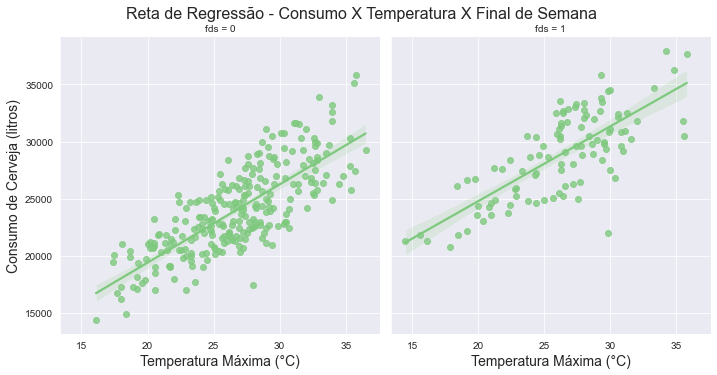

In [77]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, col="fds")
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

## AULA 4 

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [78]:
from sklearn.model_selection import train_test_split

Importando o model_selection da biblio sklearn

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [79]:
y = dados['consumo']

A variável Y é o consumo do df dados

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [80]:
X = dados[['temp_max','chuva','fds']]

A variável X são as variáveis que afetam o valor do consumo (Y) do df dados

## Criando os datasets de treino e de teste

Neste ponto, usaremos a função train_test_split para separar os conteúdos entre treino e teste.

Essa função possui como retorno uma lista de quatro itens, e precisamos atribuir a cada elemento da lista o conteúdo das variáveis. O primeiro item da lista é o x de treino, o segundo é o x de teste, depois y de treino e y de teste.

Configuraremos, ainda o test_size como 0.3,que se refere à quantidade de dados que usaremos para teste, então 30% dos dados serão selecionados de forma aleatória para a realização de testes do modelo, já o restante será para treino.

O próximo parâmetro é o random_state. Ao fixarmos um valor, por exemplo 2811, teremos um conjunto de treino e de teste idênticos.



In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

30% teste e 70% treino. O treino recebe mais dados para que o modelo possa "treinar" com mais precisão 

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [82]:
X_train.shape

(255, 3)

In [83]:
X_test.shape

(110, 3)

In [84]:
X_train.shape[0]+X_test.shape[0]

365

In [85]:
y_train.shape[0]+y_test.shape[0]

365

In [86]:
y_train.shape[0]

255

In [87]:
y_test.shape[0]

110

Ou seja, são 110 dados para o y_teste (30%) e 255 para o y_train (70%) de um total de 365

Yi = β1 + β2X2i + β3X3i + β4X4i + ui



## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Importando a função de regressão linear

## Instanciando a classe *LinearRegression()*

In [89]:
modelo = LinearRegression()

Criando a variável MODELO que armazenara os dados para ocorrer a regressão linear dos nossos dados

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

Instanciaremos a classe LinearRegression(). Em seguida utilizaremos o método fit(), que nos auxiliará a saber os passos a serem trilhados. Esse método precisará receber os dados x e y de treino.



In [90]:
modelo.fit(X_train, y_train)

LinearRegression()

O modelo recebe os dados de treino (70% - mais precisão no modelo) para que ele possa "treinar" como funciona e aplicar nos dados de TESTE

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [91]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


Mais dados, maior o R²

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

Criaremos uma variável chamada y_previsto que receberá modelo. Em seguida, evocamos o método predict() pera realizar de fato a previsão, utilizando como parâmetro X de teste

Para conseguirmos explicar os resultados que serão obtidos na previsão, utilizaremos o metrics(), e o r2_score(). Precisaremos passar os parâmetros y_test_ e y_previsto. Ao final, teremos a seguinte estrutura:



In [92]:
y_previsto = modelo.predict(X_test)

Depois do modelo ter "treinado" agora ele irá aplicar nos dados de teste. Previu-se o y (y_previsto) a partir dos dados de teste (X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [93]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


Teremos como resultado o valor R² = 0.69. Ao aumentarmos o número de variáveis as estatísticas poderão ser melhoradas e assim teremos um modelo mais eficiente.



# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

Na célula "Dados de Entrada", coletaremos o primeiro registro (primeira linha) de X_test, e armazenaremos isso na variável entrada.



In [94]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [95]:
modelo.predict(entrada)[0]

26094.901775262017

Ou seja, se X (temp_max, chuva e fds) = (30.5, 12.2, 0) o valor de Y (Consumo de cerveja) = 26094

## Criando um simulador simples

Podemos criar alguns estimadores simples, que podem ser utilizados nos mais variados contextos. Como por exemplo estimar quanto será o consumo de cerveja no fim de semana, utilizando as variáveis fds, chuva e temp_max. Essa será nossa entrada, depois, basta inserir o modelo.



In [96]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


Ou seja, se chutarmos os valores de temp_max=40, chuva=0 e fdp=1 e colocar na variável entrada os valores estimados, e passar para o modelo.predict() ele retorna o valor do Y, ou do consumo

# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

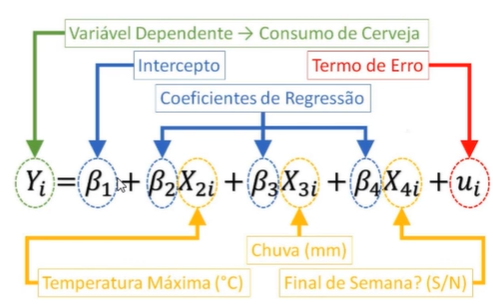

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b>, ou coeficiente linear, representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.Ou seja, quando X=0.</p>.

Intercepto: representa o efeito médio em Y, excluindo os efeitos das outras variáveis do modelo. Obtemos esse resultado ao escrever modelo.intercept_



In [97]:
modelo.intercept_

5951.976339312445

Ou seja, este é o coeficiente linear 

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [98]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

Estes são os coeficientes angulares

## Confirmando a ordem das variáveis explicativas no DataFrame

In [99]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [100]:
index=['Coeficiente Linear','Temp. Máxima','Chuva','Final de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [101]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Coeficientes'])

,Coeficientes
Coeficiente Linear,5951.976339
Temp. Máxima,684.736759
Chuva,-60.782435
Final de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [102]:
y_previsto_train = modelo.predict(X_train)

Agora vamos prever os dados de y de treino só usando os dados de x de treino. Depois comparar o y_previsto_train com o y_train para ver se o modelo teve uma boa acertividade e ver se tem resíduos

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Criaremos um gráfico de dispersão entre o valor estimado (y_previsto_train) e o valor real (y_train). As configurações necessárias para gerar esse gráfico já foram disponibilizadas no notebook que estamos trabalhando. Utilizaremos sns.scatterplot() para gerar o gráfico, e passaremos x=y_previsto_train, em seguida y=y_train.



Ou seja, vamos comparar os dois y's para ver se o modelo e o teste foi correto. O y_train está com os dados de treino (70% dos dados), e o y_previsto_train é o y pós modelo que recebeu os dados do x_train.

OBS: O y_previsto ele tinha recebido os dados de teste (x_test) só para testar o modelo. Depois de testado ai criamos o y_previsto_train com mais dados (dados de treino, 70%) para comparar com o y_train original.

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

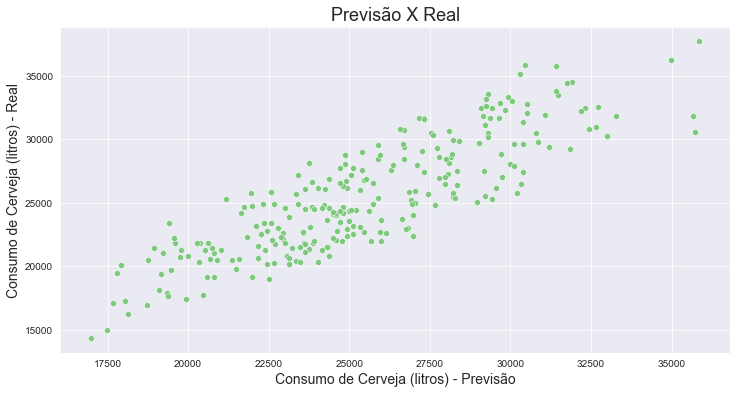

In [103]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

Ao analisar o gráfico visualmente, podemos encontrar alguns problemas. As previsões ao final do gráfico parecem dispersas ao lidar com valores mais altos. Caso fossem iguais, era para todos os pontos estarem um em cima do outro. Iremos estudar os resíduos, ou Ui no nosso coeficiente. Para evocá-lo escreveremos:



## Obtendo os resíduos

In [104]:
residuo = y_train - y_previsto_train

o y_train contém os dados do modelo separados em treino (70%) e o y_previsto_train é o modelo ja testado com os dados de treino x_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

Plotando o y_previsto_train e os resíduos

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

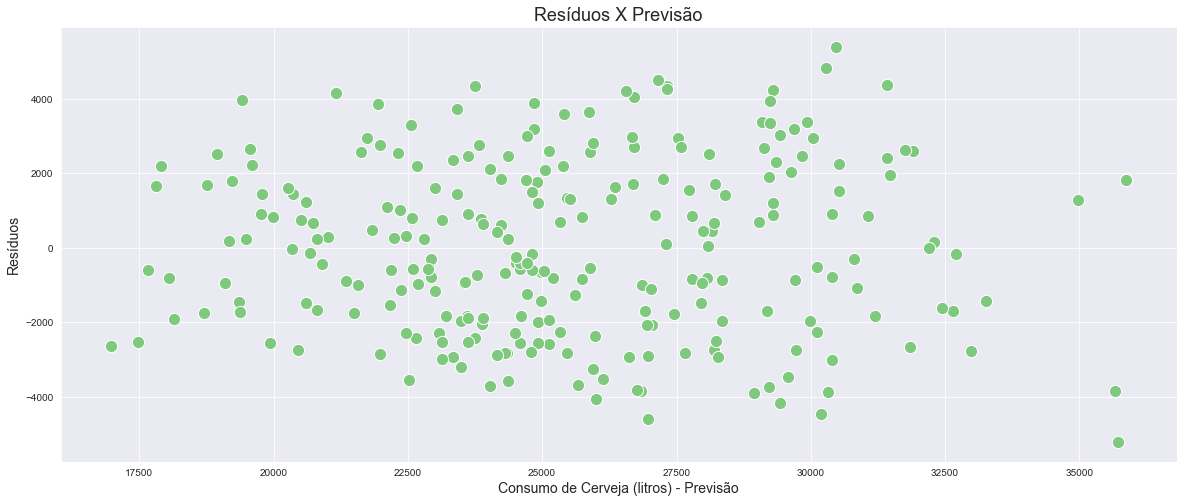

In [105]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Teremos o gráfico com os pontos dispersos. Podemos aumentar o tamanho dos pontos ao inserir em sns.scatterplot() o parâmetro s=150. Dessa maneira, facilitamos a visualização

 É importante observarmos que a variância dos resíduos deve ser constante, o que chamamos do princípio de homocedasticidade, importante para o modelo de regressão.

## Utilizando os resíduos ao quadrado

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

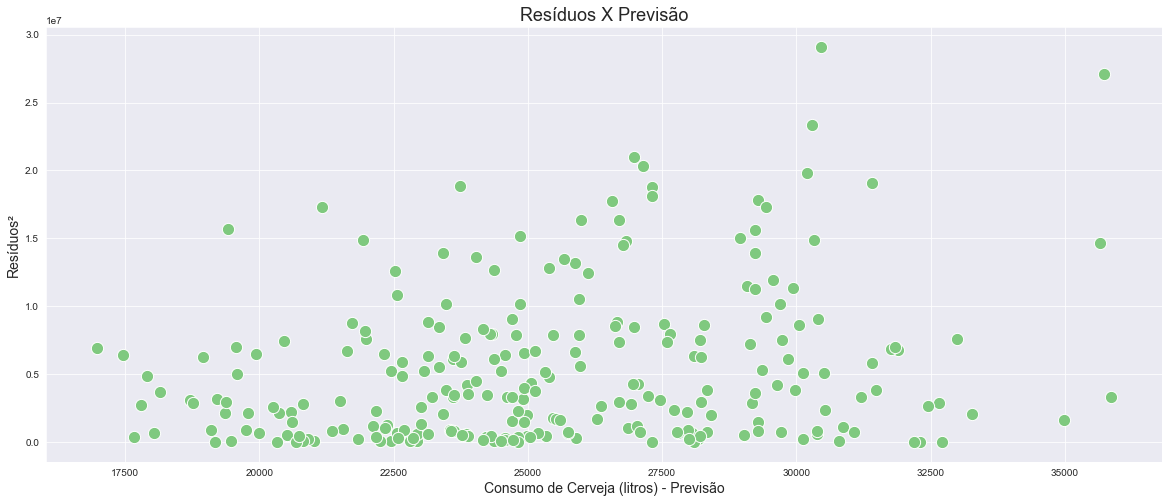

In [106]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

Dessa maneira podemos verificar com mais clareza se de fato há uma variação constante no resíduo. Como estamos lidando com um conjunto de dados pequeno, esse problema geralmente ocorre.

Podemos plotar um gráfico com a distribuição de frequência de resíduos, para tanto escreveremos ax = sns.distplot(residuo) e mantemos as configurações que já estávamos utilizando.

## Plotando a distribuição de frequências dos resíduos

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

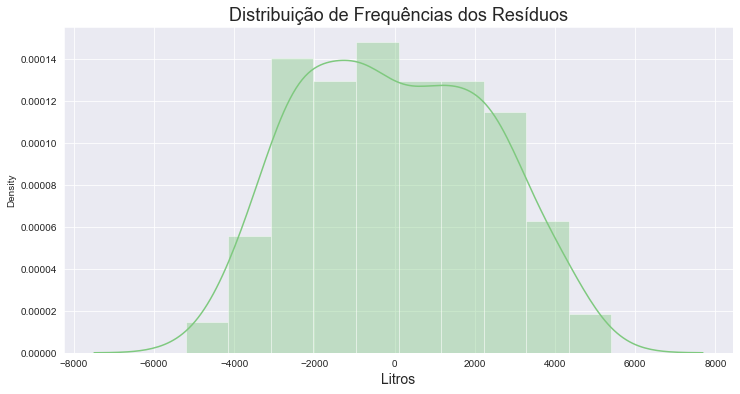

In [107]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

Veremos algo que se assemelha a uma curva normal, mas se aumentamos o número de barras que constitui o gráfico inserindo o parâmetro bins=50 veremos que a variação apresenta problemas.

Como estamos utilizando dados temporais em nosso projeto, seria interessante estimar os dados completos e plotar os resíduos no tempo.

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [116]:
y2_ = dados[['consumo']]

In [117]:
X2 = dados[['temp_media', 'chuva', 'fds']]

Criou-se a variável x2 para receber as variáveis x's diferentes, no caso a temp_media agora

## Criando os datasets de treino e de teste

In [118]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

Criou-se os dados de treino e teste

## Instanciando a classe *LinearRegression()*

In [135]:
modelo_2 = LinearRegression()

Criou-se o modelo 2 que realizara a regressão linear

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

Ajustaremos o novo modelo utilizando o método fit() que receberá como parâmetro o X2 e o y2 de treino.



In [120]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

O modelo 2 irá treinar agora com os valores de x2_treino e y2_treino

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [127]:
print('Modelo com Tem. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Tem. Máxima
R² = 0.73


In [123]:
print('Modelo com Tem. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Tem. Média
R² = 0.66


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [132]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

Depois de testado com os dados de treino, agora o modelo realizará a regressão com os dados de teste

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [133]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


In [134]:
print('R² = %s' % metrics.r2_score(y2_test, y_previsto_2).round(2))

R² = 0.66


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



Trata-se, justamente, do resíduo elevado ao quadrado e obter a média desses elementos, teremos, portanto, uma informação em litros ao quadrado. Teremos também a variação média do erro dessa previsão, em litros.



## Obtendo métricas para o modelo com Temperatura Média

In [136]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [137]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2= metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


Ou seja, o modelo de Temperatura Máxima feito anteriormente apresentou um R² maior e um EQM menor, portanto ele é um modelo melhor para efeito de comparação

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [143]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [145]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [146]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max,chuva,fds]]

modelo.predict(entrada)[0]

26094.901775262017

## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [147]:
import pickle

In [148]:
output = open('modelo_consumo_cerveja', 'wb') #nome, 'writebinner'
pickle.dump(modelo, output) #chamar o pickle - passa o modelo e output
output.close()

Use o código abaixo para chamar o modelo

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```

Foi disponibilizado um pequeno script que você poderá copiar e colar em outro notebook, totalmente limpo sem nada na memória.

Dessa maneira, todas as informações já terão sido carregadas e a estimativa será calculada, ainda que em um notebook totalmente novo.

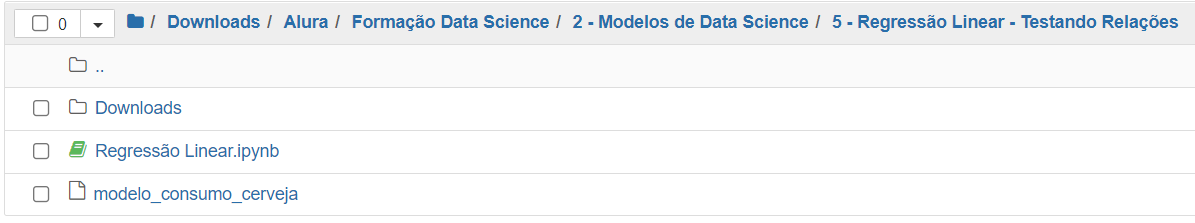